### 1. Presedential Polls Data

In [1]:
import pandas as pd
import numpy as np


In [2]:
polls_df=pd.read_csv('president_polls_2016.csv')

In [3]:
polls_df.head()

,cycle,branch,type,matchup,forecastdate,state,startdate,enddate,pollster,grade,...,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin,multiversions,url,poll_id,question_id,createddate,timestamp
0,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/8/16,U.S.,11/3/2016,11/6/2016,ABC News/Washington Post,A+,...,45.20163,41.72430,4.626221,NaN,NaN,https://www.washingtonpost.com/news/the-fix/wp...,48630,76192,11/7/16,09:35:33 8 Nov 2016
1,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/8/16,U.S.,11/1/2016,11/7/2016,Google Consumer Surveys,B,...,43.34557,41.21439,5.175792,NaN,NaN,https://datastudio.google.com/u/0/#/org//repor...,48847,76443,11/7/16,09:35:33 8 Nov 2016
2,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/8/16,U.S.,11/2/2016,11/6/2016,Ipsos,A-,...,42.02638,38.81620,6.844734,NaN,NaN,http://projects.fivethirtyeight.com/polls/2016...,48922,76636,11/8/16,09:35:33 8 Nov 2016
3,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/8/16,U.S.,11/4/2016,11/7/2016,YouGov,B,...,45.65676,40.92004,6.069454,NaN,NaN,https://d25d2506sfb94s.cloudfront.net/cumulus_...,48687,76262,11/7/16,09:35:33 8 Nov 2016
4,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/8/16,U.S.,11/3/2016,11/6/2016,Gravis Marketing,B-,...,46.84089,42.33184,3.726098,NaN,NaN,http://www.gravispolls.com/2016/11/final-natio...,48848,76444,11/7/16,09:35:33 8 Nov 2016


In [15]:
polls_df['grade'].unique()

array(['A+', 'B', 'A-', 'B-', 'A', nan, 'B+', 'C+', 'C-', 'C', 'D'],
      dtype=object)

In [29]:
polls_df[-polls_df['grade'].isin(['A','B','C'])]['grade'].unique()

array(['A+', 'A-', 'B-', nan, 'B+', 'C+', 'C-', 'D'], dtype=object)

In [40]:
polls_df['grade'].nunique()

10

In [29]:
polls_df.shape

(12624, 27)

In [30]:
polls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12624 entries, 0 to 12623
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cycle             12624 non-null  int64  
 1   branch            12624 non-null  object 
 2   type              12624 non-null  object 
 3   matchup           12624 non-null  object 
 4   forecastdate      12624 non-null  object 
 5   state             12624 non-null  object 
 6   startdate         12624 non-null  object 
 7   enddate           12624 non-null  object 
 8   pollster          12624 non-null  object 
 9   grade             11337 non-null  object 
 10  samplesize        12621 non-null  float64
 11  population        12624 non-null  object 
 12  poll_wt           12624 non-null  float64
 13  rawpoll_clinton   12624 non-null  float64
 14  rawpoll_trump     12624 non-null  float64
 15  rawpoll_johnson   8397 non-null   float64
 16  rawpoll_mcmullin  90 non-null     float6

In [31]:
polls_df.tail(2)

,cycle,branch,type,matchup,forecastdate,state,startdate,enddate,pollster,grade,...,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin,multiversions,url,poll_id,question_id,createddate,timestamp
12622,2016,President,polls-only,Clinton vs. Trump vs. Johnson,11/8/16,Virginia,9/30/2016,10/6/2016,Ipsos,A-,...,49.57558,39.96954,NaN,NaN,NaN,http://www.reuters.com/statesofthenation/,46675,72969,10/10/16,09:14:14 8 Nov 2016
12623,2016,President,polls-only,Clinton vs. Trump vs. Johnson,11/8/16,Wisconsin,6/9/2016,6/12/2016,Marquette University,A,...,46.40999,39.19839,NaN,NaN,NaN,https://law.marquette.edu/poll/2016/06/15/new-...,44341,66966,6/15/16,09:14:14 8 Nov 2016


In [32]:
polls_df['cycle'].head()


0    2016
1    2016
2    2016
3    2016
4    2016
Name: cycle, dtype: int64

In [41]:
polls_df["cycle"].unique()

array([2016], dtype=int64)

In [34]:
polls_df.nunique()

cycle                   1
branch                  1
type                    3
matchup                 1
forecastdate            1
state                  57
startdate             352
enddate               345
pollster              196
grade                  10
samplesize           1766
population              4
poll_wt              4399
rawpoll_clinton      1312
rawpoll_trump        1385
rawpoll_johnson       584
rawpoll_mcmullin       16
adjpoll_clinton     12569
adjpoll_trump       12582
adjpoll_johnson      6629
adjpoll_mcmullin       57
multiversions           1
url                  1304
poll_id              4208
question_id          4208
createddate           222
timestamp               3
dtype: int64

In [35]:
polls_df.apply(pd.unique)

cycle                                                          [2016]
branch                                                    [President]
type                               [polls-plus, now-cast, polls-only]
matchup                               [Clinton vs. Trump vs. Johnson]
forecastdate                                                [11/8/16]
state               [U.S., New Mexico, Virginia, Iowa, Wisconsin, ...
startdate           [11/3/2016, 11/1/2016, 11/2/2016, 11/4/2016, 1...
enddate             [11/6/2016, 11/7/2016, 11/5/2016, 11/4/2016, 1...
pollster            [ABC News/Washington Post, Google Consumer Sur...
grade                       [A+, B, A-, B-, A, nan, B+, C+, C-, C, D]
samplesize          [2220.0, 26574.0, 2195.0, 3677.0, 16639.0, 129...
population                                             [lv, rv, a, v]
poll_wt             [8.720654, 7.628472, 6.424334, 6.087135, 5.316...
rawpoll_clinton     [47.0, 38.03, 42.0, 45.0, 48.0, 44.0, 46.0, 41...
rawpoll_trump       

In [36]:
polls_df["cycle"].nunique()

1

In [37]:
polls_df['grade'].unique()

array(['A+', 'B', 'A-', 'B-', 'A', nan, 'B+', 'C+', 'C-', 'C', 'D'],
      dtype=object)

In [38]:
polls_df['grade'].nunique()

10

In [39]:
polls_df.nunique()

cycle                   1
branch                  1
type                    3
matchup                 1
forecastdate            1
state                  57
startdate             352
enddate               345
pollster              196
grade                  10
samplesize           1766
population              4
poll_wt              4399
rawpoll_clinton      1312
rawpoll_trump        1385
rawpoll_johnson       584
rawpoll_mcmullin       16
adjpoll_clinton     12569
adjpoll_trump       12582
adjpoll_johnson      6629
adjpoll_mcmullin       57
multiversions           1
url                  1304
poll_id              4208
question_id          4208
createddate           222
timestamp               3
dtype: int64

In [40]:
polls_df[['cycle','branch','type','matchup']].head(6)

,cycle,branch,type,matchup
0,2016,President,polls-plus,Clinton vs. Trump vs. Johnson
1,2016,President,polls-plus,Clinton vs. Trump vs. Johnson
2,2016,President,polls-plus,Clinton vs. Trump vs. Johnson
3,2016,President,polls-plus,Clinton vs. Trump vs. Johnson
4,2016,President,polls-plus,Clinton vs. Trump vs. Johnson
5,2016,President,polls-plus,Clinton vs. Trump vs. Johnson


In [41]:
polls_df.columns



Index(['cycle', 'branch', 'type', 'matchup', 'forecastdate', 'state',
       'startdate', 'enddate', 'pollster', 'grade', 'samplesize', 'population',
       'poll_wt', 'rawpoll_clinton', 'rawpoll_trump', 'rawpoll_johnson',
       'rawpoll_mcmullin', 'adjpoll_clinton', 'adjpoll_trump',
       'adjpoll_johnson', 'adjpoll_mcmullin', 'multiversions', 'url',
       'poll_id', 'question_id', 'createddate', 'timestamp'],
      dtype='object')

In [42]:
# for col in polls_df:
#     print(polls_df[col].unique())
polls_df.apply(pd.unique)

cycle                                                          [2016]
branch                                                    [President]
type                               [polls-plus, now-cast, polls-only]
matchup                               [Clinton vs. Trump vs. Johnson]
forecastdate                                                [11/8/16]
state               [U.S., New Mexico, Virginia, Iowa, Wisconsin, ...
startdate           [11/3/2016, 11/1/2016, 11/2/2016, 11/4/2016, 1...
enddate             [11/6/2016, 11/7/2016, 11/5/2016, 11/4/2016, 1...
pollster            [ABC News/Washington Post, Google Consumer Sur...
grade                       [A+, B, A-, B-, A, nan, B+, C+, C-, C, D]
samplesize          [2220.0, 26574.0, 2195.0, 3677.0, 16639.0, 129...
population                                             [lv, rv, a, v]
poll_wt             [8.720654, 7.628472, 6.424334, 6.087135, 5.316...
rawpoll_clinton     [47.0, 38.03, 42.0, 45.0, 48.0, 44.0, 46.0, 41...
rawpoll_trump       

In [43]:
polls_df['state'].unique()

array(['U.S.', 'New Mexico', 'Virginia', 'Iowa', 'Wisconsin',
       'North Carolina', 'Georgia', 'Florida', 'Oregon', 'Ohio',
       'South Carolina', 'New York', 'Michigan', 'Pennsylvania',
       'Missouri', 'New Hampshire', 'Arizona', 'Nevada', 'Colorado',
       'California', 'Washington', 'Texas', 'Utah', 'Illinois', 'Indiana',
       'Tennessee', 'Connecticut', 'Massachusetts', 'New Jersey',
       'Kansas', 'Kentucky', 'Minnesota', 'Oklahoma', 'Maryland',
       'Alabama', 'Nebraska', 'Louisiana', 'Maine', 'Arkansas', 'Alaska',
       'Vermont', 'Idaho', 'Mississippi', 'West Virginia', 'South Dakota',
       'Montana', 'Hawaii', 'Maine CD-1', 'Maine CD-2', 'Rhode Island',
       'Nebraska CD-3', 'Nebraska CD-1', 'Delaware', 'North Dakota',
       'District of Columbia', 'Nebraska CD-2', 'Wyoming'], dtype=object)

In [44]:
polls_df['state'].value_counts()

U.S.                    3318
Florida                  444
North Carolina           375
Pennsylvania             375
Ohio                     345
New Hampshire            336
Nevada                   279
Virginia                 273
Michigan                 258
Wisconsin                240
Georgia                  240
Colorado                 240
Arizona                  237
California               213
Iowa                     210
Missouri                 204
Utah                     198
New York                 189
Illinois                 180
Texas                    174
Indiana                  168
New Jersey               162
Oregon                   162
Maine                    159
South Carolina           156
Washington               153
Massachusetts            153
New Mexico               153
Kansas                   153
Louisiana                150
Kentucky                 147
Idaho                    144
Minnesota                144
Maryland                 141
West Virginia 

In [45]:
polls_df['state'].value_counts(normalize=True).mul(100).round(2).astype(str)

U.S.                    26.28
Florida                  3.52
North Carolina           2.97
Pennsylvania             2.97
Ohio                     2.73
New Hampshire            2.66
Nevada                   2.21
Virginia                 2.16
Michigan                 2.04
Wisconsin                 1.9
Georgia                   1.9
Colorado                  1.9
Arizona                  1.88
California               1.69
Iowa                     1.66
Missouri                 1.62
Utah                     1.57
New York                  1.5
Illinois                 1.43
Texas                    1.38
Indiana                  1.33
New Jersey               1.28
Oregon                   1.28
Maine                    1.26
South Carolina           1.24
Washington               1.21
Massachusetts            1.21
New Mexico               1.21
Kansas                   1.21
Louisiana                1.19
Kentucky                 1.16
Idaho                    1.14
Minnesota                1.14
Maryland  

In [46]:
polls_df[['state','grade']].head(10)

,state,grade
0,U.S.,A+
1,U.S.,B
2,U.S.,A-
3,U.S.,B
4,U.S.,B-
5,U.S.,A
6,U.S.,A-
7,U.S.,A-
8,New Mexico,NaN
9,U.S.,A-


In [47]:
(polls_df[(polls_df['state']=='U.S.')]['grade']=='A-').sum()



1215

In [48]:
polls_df[['state','grade']].value_counts().head(10)

state           grade
U.S.            A-       1215
                C+        546
                B         162
                C-        126
                A+        114
                B+        105
                B-         96
New Hampshire   B          90
U.S.            A          87
North Carolina  B+         81
dtype: int64

In [49]:
polls_df['type'].nunique()

3

In [50]:
polls_df.drop(['cycle','branch'],axis=1,inplace=True)
#df.drop(column = ['cycle','branch'], inplace= True)

In [51]:
polls_df.head()


,type,matchup,forecastdate,state,startdate,enddate,pollster,grade,samplesize,population,...,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin,multiversions,url,poll_id,question_id,createddate,timestamp
0,polls-plus,Clinton vs. Trump vs. Johnson,11/8/16,U.S.,11/3/2016,11/6/2016,ABC News/Washington Post,A+,2220.0,lv,...,45.20163,41.72430,4.626221,NaN,NaN,https://www.washingtonpost.com/news/the-fix/wp...,48630,76192,11/7/16,09:35:33 8 Nov 2016
1,polls-plus,Clinton vs. Trump vs. Johnson,11/8/16,U.S.,11/1/2016,11/7/2016,Google Consumer Surveys,B,26574.0,lv,...,43.34557,41.21439,5.175792,NaN,NaN,https://datastudio.google.com/u/0/#/org//repor...,48847,76443,11/7/16,09:35:33 8 Nov 2016
2,polls-plus,Clinton vs. Trump vs. Johnson,11/8/16,U.S.,11/2/2016,11/6/2016,Ipsos,A-,2195.0,lv,...,42.02638,38.81620,6.844734,NaN,NaN,http://projects.fivethirtyeight.com/polls/2016...,48922,76636,11/8/16,09:35:33 8 Nov 2016
3,polls-plus,Clinton vs. Trump vs. Johnson,11/8/16,U.S.,11/4/2016,11/7/2016,YouGov,B,3677.0,lv,...,45.65676,40.92004,6.069454,NaN,NaN,https://d25d2506sfb94s.cloudfront.net/cumulus_...,48687,76262,11/7/16,09:35:33 8 Nov 2016
4,polls-plus,Clinton vs. Trump vs. Johnson,11/8/16,U.S.,11/3/2016,11/6/2016,Gravis Marketing,B-,16639.0,rv,...,46.84089,42.33184,3.726098,NaN,NaN,http://www.gravispolls.com/2016/11/final-natio...,48848,76444,11/7/16,09:35:33 8 Nov 2016


In [52]:
polls_df.rename(columns={'rawpoll_trump':'trump_believers_pc','rawpoll_clinton':'clinton_believers_pc','rawpoll_johnson':'johnson_believers_pc','rawpoll_mcmullin':'mcmullin_believers_pc'},inplace=True)

In [53]:
polls_df.columns

Index(['type', 'matchup', 'forecastdate', 'state', 'startdate', 'enddate',
       'pollster', 'grade', 'samplesize', 'population', 'poll_wt',
       'clinton_believers_pc', 'trump_believers_pc', 'johnson_believers_pc',
       'mcmullin_believers_pc', 'adjpoll_clinton', 'adjpoll_trump',
       'adjpoll_johnson', 'adjpoll_mcmullin', 'multiversions', 'url',
       'poll_id', 'question_id', 'createddate', 'timestamp'],
      dtype='object')

In [54]:
dict_1 ={'ontario':'Toronto','manitoba':'winnipeg','bc':'vancouver'}


In [55]:
dict_1

{'ontario': 'Toronto', 'manitoba': 'winnipeg', 'bc': 'vancouver'}

In [56]:
for i in dict_1.items():
    print(i)

('ontario', 'Toronto')
('manitoba', 'winnipeg')
('bc', 'vancouver')


In [57]:
for k,v in dict_1.items():
    print(v)

Toronto
winnipeg
vancouver


In [58]:
dict_2= {'ontario':['Toronto','Belleville'],'manitoba':['winnipeg','brandon'],'bc':['vancouver','vernon']}

In [59]:
for k, v in dict_2.items():
    print(k,v)


ontario ['Toronto', 'Belleville']
manitoba ['winnipeg', 'brandon']
bc ['vancouver', 'vernon']


In [60]:
dict_2.values()

dict_values([['Toronto', 'Belleville'], ['winnipeg', 'brandon'], ['vancouver', 'vernon']])

In [61]:
polls_df.shape

(12624, 25)

##### (iv) How to find and fix missing values:


In [3]:
df= pd.read_csv('mortality_missing_values.csv')

In [4]:
df.head()

,Year,AgeGroup,DeathRate
0,1900.0,01-04 Years,1983.8
1,NaN,01-04 Years,1695.0
2,1902.0,01-04 Years,NaN
3,1903.0,01-04 Years,1542.1
4,NaN,01-04 Years,NaN


In [5]:
df.shape
#df.shape[0] for rows 1 fo col


(476, 3)

In [6]:
df.notnull().sum()

Year         473
AgeGroup     476
DeathRate    472
dtype: int64

In [7]:
df.isna().sum()

Year         3
AgeGroup     0
DeathRate    4
dtype: int64

In [8]:
df.isnull().sum()

Year         3
AgeGroup     0
DeathRate    4
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       473 non-null    float64
 1   AgeGroup   476 non-null    object 
 2   DeathRate  472 non-null    float64
dtypes: float64(2), object(1)
memory usage: 11.3+ KB


In [10]:
df[df.isnull().any(axis=1)]

,Year,AgeGroup,DeathRate
1,NaN,01-04 Years,1695.0
2,1902.0,01-04 Years,NaN
4,NaN,01-04 Years,NaN
6,NaN,01-04 Years,NaN
7,1907.0,01-04 Years,NaN


In [11]:
df[df['DeathRate'].isnull()]

,Year,AgeGroup,DeathRate
2,1902.0,01-04 Years,NaN
4,NaN,01-04 Years,NaN
6,NaN,01-04 Years,NaN
7,1907.0,01-04 Years,NaN


In [12]:
df[df['DeathRate'].notnull()]

,Year,AgeGroup,DeathRate
0,1900.0,01-04 Years,1983.8
1,NaN,01-04 Years,1695.0
3,1903.0,01-04 Years,1542.1
5,1905.0,01-04 Years,1498.9
8,1908.0,01-04 Years,1396.8
...,...,...,...
471,2014.0,15-19 Years,45.5
472,2015.0,15-19 Years,48.3
473,2016.0,15-19 Years,51.2
474,2017.0,15-19 Years,51.5


In [13]:
df.isnull().any(axis=1).sum()

5

In [14]:
 #df.dropna()

In [15]:
df[df.isnull().sum(axis=1)>=2]

,Year,AgeGroup,DeathRate
4,NaN,01-04 Years,NaN
6,NaN,01-04 Years,NaN


In [16]:
df.dropna(thresh=2,inplace=False)

,Year,AgeGroup,DeathRate
0,1900.0,01-04 Years,1983.8
1,NaN,01-04 Years,1695.0
2,1902.0,01-04 Years,NaN
3,1903.0,01-04 Years,1542.1
5,1905.0,01-04 Years,1498.9
...,...,...,...
471,2014.0,15-19 Years,45.5
472,2015.0,15-19 Years,48.3
473,2016.0,15-19 Years,51.2
474,2017.0,15-19 Years,51.5


In [17]:
df.dropna(subset='DeathRate',inplace=False)

,Year,AgeGroup,DeathRate
0,1900.0,01-04 Years,1983.8
1,NaN,01-04 Years,1695.0
3,1903.0,01-04 Years,1542.1
5,1905.0,01-04 Years,1498.9
8,1908.0,01-04 Years,1396.8
...,...,...,...
471,2014.0,15-19 Years,45.5
472,2015.0,15-19 Years,48.3
473,2016.0,15-19 Years,51.2
474,2017.0,15-19 Years,51.5


#### Imputation of missing value:

In [18]:
df.head()

,Year,AgeGroup,DeathRate
0,1900.0,01-04 Years,1983.8
1,NaN,01-04 Years,1695.0
2,1902.0,01-04 Years,NaN
3,1903.0,01-04 Years,1542.1
4,NaN,01-04 Years,NaN


 ### mean imputation

In [19]:
df['DeathRate'].fillna(value=df['DeathRate'].mean(),inplace=True)

In [20]:
df.head()

,Year,AgeGroup,DeathRate
0,1900.0,01-04 Years,1983.800000
1,NaN,01-04 Years,1695.000000
2,1902.0,01-04 Years,181.221186
3,1903.0,01-04 Years,1542.100000
4,NaN,01-04 Years,181.221186


# forward fill 



In [21]:
df.fillna(method='ffill',limit=2, inplace = True)

In [22]:
df.head()

,Year,AgeGroup,DeathRate
0,1900.0,01-04 Years,1983.800000
1,1900.0,01-04 Years,1695.000000
2,1902.0,01-04 Years,181.221186
3,1903.0,01-04 Years,1542.100000
4,1903.0,01-04 Years,181.221186


In [23]:
df.isnull().sum()

Year         0
AgeGroup     0
DeathRate    0
dtype: int64

In [24]:
df.describe()

,Year,DeathRate
count,476.000000,476.000000
mean,1958.993697,181.221186
std,34.397521,264.096370
min,1900.000000,11.400000
25%,1929.000000,40.575000
50%,1959.000000,89.500000
75%,1989.000000,218.925000
max,2018.000000,1983.800000


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       476 non-null    float64
 1   AgeGroup   476 non-null    object 
 2   DeathRate  476 non-null    float64
dtypes: float64(2), object(1)
memory usage: 11.3+ KB


In [29]:
polls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12624 entries, 0 to 12623
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cycle             12624 non-null  int64  
 1   branch            12624 non-null  object 
 2   type              12624 non-null  object 
 3   matchup           12624 non-null  object 
 4   forecastdate      12624 non-null  object 
 5   state             12624 non-null  object 
 6   startdate         12624 non-null  object 
 7   enddate           12624 non-null  object 
 8   pollster          12624 non-null  object 
 9   grade             11337 non-null  object 
 10  samplesize        12621 non-null  float64
 11  population        12624 non-null  object 
 12  poll_wt           12624 non-null  float64
 13  rawpoll_clinton   12624 non-null  float64
 14  rawpoll_trump     12624 non-null  float64
 15  rawpoll_johnson   8397 non-null   float64
 16  rawpoll_mcmullin  90 non-null     float6

In [30]:
date_cols = ['forecastdate','startdate','enddate','createddate','timestamp']
polls_df[date_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12624 entries, 0 to 12623
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   forecastdate  12624 non-null  object
 1   startdate     12624 non-null  object
 2   enddate       12624 non-null  object
 3   createddate   12624 non-null  object
 4   timestamp     12624 non-null  object
dtypes: object(5)
memory usage: 493.3+ KB


In [31]:
polls_df[date_cols]=polls_df[date_cols].apply(pd.to_datetime)

In [88]:
polls_df[date_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12624 entries, 0 to 12623
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   forecastdate  12624 non-null  datetime64[ns]
 1   startdate     12624 non-null  datetime64[ns]
 2   enddate       12624 non-null  datetime64[ns]
 3   createddate   12624 non-null  datetime64[ns]
 4   timestamp     12624 non-null  datetime64[ns]
dtypes: datetime64[ns](5)
memory usage: 493.3 KB


In [89]:
polls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12624 entries, 0 to 12623
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   type                   12624 non-null  object        
 1   matchup                12624 non-null  object        
 2   forecastdate           12624 non-null  datetime64[ns]
 3   state                  12624 non-null  object        
 4   startdate              12624 non-null  datetime64[ns]
 5   enddate                12624 non-null  datetime64[ns]
 6   pollster               12624 non-null  object        
 7   grade                  11337 non-null  object        
 8   samplesize             12621 non-null  float64       
 9   population             12624 non-null  object        
 10  poll_wt                12624 non-null  float64       
 11  clinton_believers_pc   12624 non-null  float64       
 12  trump_believers_pc     12624 non-null  float64       
 13  j

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       476 non-null    float64
 1   AgeGroup   476 non-null    object 
 2   DeathRate  476 non-null    float64
dtypes: float64(2), object(1)
memory usage: 11.3+ KB


In [91]:
df.head()

,Year,AgeGroup,DeathRate
0,1900.0,01-04 Years,1983.800000
1,1900.0,01-04 Years,1695.000000
2,1902.0,01-04 Years,181.221186
3,1903.0,01-04 Years,1542.100000
4,1903.0,01-04 Years,181.221186


In [92]:
df['Year']=df['Year'].astype(int)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       476 non-null    int32  
 1   AgeGroup   476 non-null    object 
 2   DeathRate  476 non-null    float64
dtypes: float64(1), int32(1), object(1)
memory usage: 9.4+ KB


In [94]:
df[['Year','DeathRate']].head(25)

,Year,DeathRate
0,1900,1983.800000
1,1900,1695.000000
2,1902,181.221186
3,1903,1542.100000
4,1903,181.221186
5,1905,1498.900000
6,1905,181.221186
7,1907,181.221186
8,1908,1396.800000
9,1909,1348.900000


In [95]:
death500=df[df['DeathRate']>500]

In [96]:
death500.sort_values(by = 'Year',ascending=False)

,Year,AgeGroup,DeathRate
34,1934,01-04 Years,507.7
31,1931,01-04 Years,526.6
30,1930,01-04 Years,563.6
29,1929,01-04 Years,625.5
28,1928,01-04 Years,647.5
27,1927,01-04 Years,591.0
26,1926,01-04 Years,723.4
25,1925,01-04 Years,641.0
24,1924,01-04 Years,683.2
23,1923,01-04 Years,806.7


In [111]:
teen_df=df[df['AgeGroup']=='15-19 Years'].sort_values(by='Year')
teen_df.head(25)

,Year,AgeGroup,DeathRate
357,1900,15-19 Years,484.8
358,1901,15-19 Years,454.4
359,1902,15-19 Years,421.5
360,1903,15-19 Years,434.1
361,1904,15-19 Years,471.4
362,1905,15-19 Years,439.3
363,1906,15-19 Years,445.2
364,1907,15-19 Years,437.7
365,1908,15-19 Years,397.7
366,1909,15-19 Years,363.6


In [98]:
teen_df.describe()

,Year,DeathRate
count,119.000000,119.00000
mean,1959.000000,177.37479
std,34.496377,138.36229
min,1900.000000,44.80000
25%,1929.500000,85.45000
50%,1959.000000,106.90000
75%,1988.500000,283.65000
max,2018.000000,777.40000


In [99]:
teen_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,119.0,1959.00000,34.496377,1900.0,1929.50,1959.0,1988.50,2018.0
DeathRate,119.0,177.37479,138.362290,44.8,85.45,106.9,283.65,777.4


In [109]:
teen_df[teen_df['DeathRate']>500]

,Year,AgeGroup,DeathRate


<Axes: xlabel='Year'>

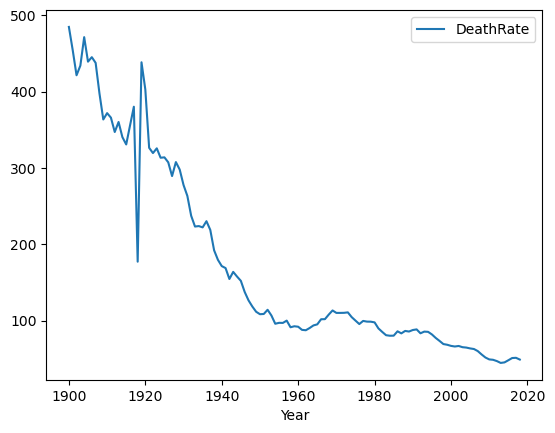

In [110]:
teen_df.plot(x='Year',y = 'DeathRate')

## Handling Outliers

In [102]:
teen_df['DeathRate'].mean()

177.3747899159664

In [103]:
teen_df.loc[teen_df['DeathRate']>500,'DeathRate']=teen_df['DeathRate'].mean()

In [104]:
teen_df[teen_df['Year']==1918]

,Year,AgeGroup,DeathRate
375,1918,15-19 Years,177.37479


<Axes: xlabel='Year'>

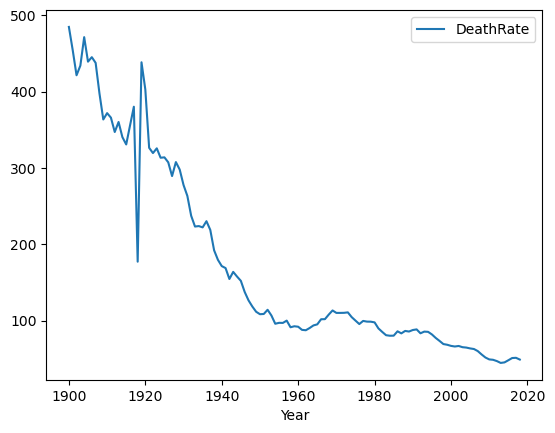

In [105]:
teen_df.plot(x='Year',y = 'DeathRate')